<a href="https://colab.research.google.com/github/iGeology-Illinois/geol581-getting-started-with-python-Kareaux/blob/main/Stereonet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#GEOL 593: Module 2 - Python - Based Stereonet Analysis
#Structural Geology and Stereonet Analysis Assignment

# 1. Library Install and Import
!pip install mplstereonet
!pip install -U scikit-learn

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mplstereonet
import pandas as pd
from sklearn.cluster import KMeans

print("Structural Geology Stereonet Notebook")



Structural Geology Stereonet Notebook


In [5]:
from google.colab import files
uploaded = files.upload()



Saving strikes and dips.csv to strikes and dips.csv


In [25]:
# 2. Import csv file and creating dataframe

dataset = pd.read_csv("/content/strikes and dips.csv")

print(dataset)

       ID  Strike   Dip             Date    MeasuredBy  \
0    P1-3    43.3  51.0   1/3/2025 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  1/12/2025 17:55    John Smith   
2    P4-1   119.4  87.8   1/16/2025 2:19   Carlos Diaz   
3    P1-7    43.2  49.4  1/10/2025 19:48  Sarah Parker   
4    P1-2    44.2  50.6  1/15/2025 22:05      Mei Chen   
5    P3-9   226.6  41.4   1/13/2025 1:42   Carlos Diaz   
6    P3-6   226.1  38.1  1/14/2025 15:10      Mei Chen   
7    P2-7   136.1  79.3  1/26/2025 22:19      Mei Chen   
8   P1-10    43.1  51.3  1/30/2025 22:38   Carlos Diaz   
9    P2-9   136.8  81.6   1/24/2025 6:09    John Smith   
10  P3-10   226.4  41.6  1/16/2025 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  1/26/2025 16:34   Carlos Diaz   
12   P1-4    45.4  48.4   1/15/2025 8:16  Sarah Parker   
13   P4-2   351.7  82.2    1/8/2025 5:35   Carlos Diaz   
14   P2-8   136.7  79.5    1/4/2025 8:47  Sarah Parker   
15   P3-4   225.0  41.6   1/4/2025 11:29    John Smith   
16   P2-1   13

In [26]:
#3.1 Converting to Poles and Plotting Stereonets
strikes = dataset['Strike']
dips = dataset['Dip']

#Creating poles
pole = mplstereonet.pole(strikes, dips)

#Separating Pole into distinct tuples
longitude, latitude = pole

#Generating Dataframe Using Pole data
pole_df = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude}, index=dataset.index)

#Assigning Latitude and Longitude columns to dataset Dataframe
dataset[['Latitude', 'Longitude']] = pole_df

print(dataset)


       ID  Strike   Dip             Date    MeasuredBy  \
0    P1-3    43.3  51.0   1/3/2025 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  1/12/2025 17:55    John Smith   
2    P4-1   119.4  87.8   1/16/2025 2:19   Carlos Diaz   
3    P1-7    43.2  49.4  1/10/2025 19:48  Sarah Parker   
4    P1-2    44.2  50.6  1/15/2025 22:05      Mei Chen   
5    P3-9   226.6  41.4   1/13/2025 1:42   Carlos Diaz   
6    P3-6   226.1  38.1  1/14/2025 15:10      Mei Chen   
7    P2-7   136.1  79.3  1/26/2025 22:19      Mei Chen   
8   P1-10    43.1  51.3  1/30/2025 22:38   Carlos Diaz   
9    P2-9   136.8  81.6   1/24/2025 6:09    John Smith   
10  P3-10   226.4  41.6  1/16/2025 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  1/26/2025 16:34   Carlos Diaz   
12   P1-4    45.4  48.4   1/15/2025 8:16  Sarah Parker   
13   P4-2   351.7  82.2    1/8/2025 5:35   Carlos Diaz   
14   P2-8   136.7  79.5    1/4/2025 8:47  Sarah Parker   
15   P3-4   225.0  41.6   1/4/2025 11:29    John Smith   
16   P2-1   13

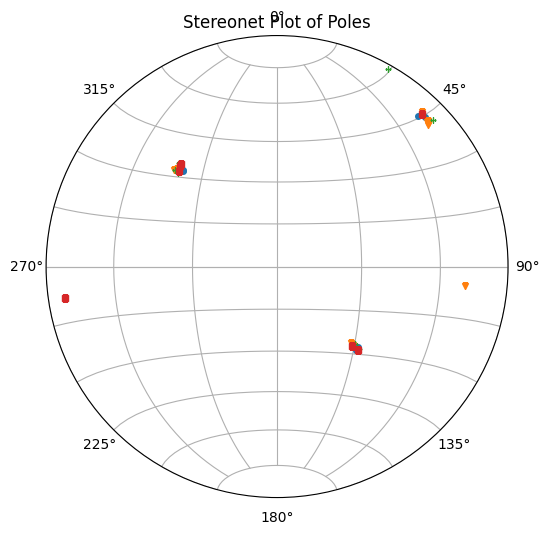

In [27]:
#3.2 Plotting Poles on Stereonet



#Separating by Site
SiteA = dataset[dataset['Location']=='Site A']
SiteB = dataset[dataset['Location']=='Site B']
SiteC = dataset[dataset['Location']=='Site C']
SiteD = dataset[dataset['Location']=='Site D']

poleA = mplstereonet.pole(SiteA['Strike'], SiteA['Dip'])
poleB = mplstereonet.pole(SiteB['Strike'], SiteB['Dip'])
poleC = mplstereonet.pole(SiteC['Strike'], SiteC['Dip'])
poleD = mplstereonet.pole(SiteD['Strike'], SiteD['Dip'])


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the poles on the stereonet axes
ax.plot(poleA[0], poleA[1], 'o', markersize=4)
ax.plot(poleB[0], poleB[1], 'v', markersize=4)
ax.plot(poleC[0], poleC[1], '+', markersize=4)
ax.plot(poleD[0], poleD[1], 's', markersize=4)


ax.grid(True)
plt.title('Stereonet Plot of Poles')
plt.show()



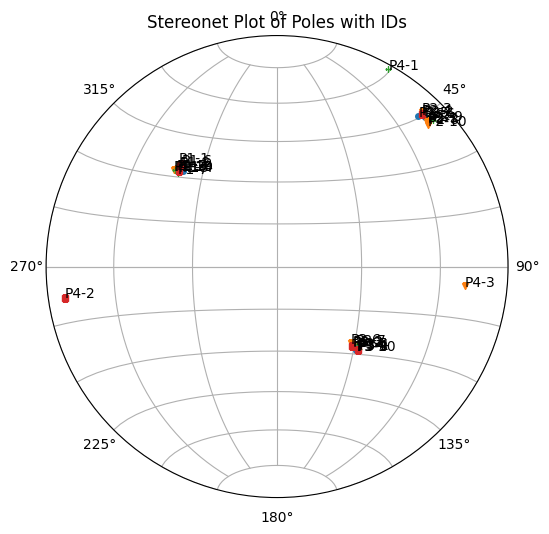

In [28]:

#3.2 Plotting Poles on Stereonet



#Separating by Site
SiteA = dataset[dataset['Location']=='Site A']
SiteB = dataset[dataset['Location']=='Site B']
SiteC = dataset[dataset['Location']=='Site C']
SiteD = dataset[dataset['Location']=='Site D']

poleA = mplstereonet.pole(SiteA['Strike'], SiteA['Dip'])
poleB = mplstereonet.pole(SiteB['Strike'], SiteB['Dip'])
poleC = mplstereonet.pole(SiteC['Strike'], SiteC['Dip'])
poleD = mplstereonet.pole(SiteD['Strike'], SiteD['Dip'])


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the poles on the stereonet axes
ax.plot(poleA[0], poleA[1], 'o', markersize=4)
ax.plot(poleB[0], poleB[1], 'v', markersize=4)
ax.plot(poleC[0], poleC[1], '+', markersize=4)
ax.plot(poleD[0], poleD[1], 's', markersize=4)

for i, ID in enumerate(SiteA['ID']): # Iterate through IDs of Site A
    plt.annotate(ID, (poleA[0][i], poleA[1][i]), textcoords='data')
for i, ID in enumerate(SiteB['ID']): # Iterate through IDs of Site B
    plt.annotate(ID, (poleB[0][i], poleB[1][i]), textcoords='data')
for i, ID in enumerate(SiteC['ID']): # Iterate through IDs of Site C
    plt.annotate(ID, (poleC[0][i], poleC[1][i]), textcoords='data')
for i, ID in enumerate(SiteD['ID']): # Iterate through IDs of Site D
    plt.annotate(ID, (poleD[0][i], poleD[1][i]), textcoords='data')

ax.grid(True)
plt.title('Stereonet Plot of Poles with IDs')
plt.show()




<ipython-input-29-b5505adf510d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = pred


       ID  Strike   Dip             Date   MeasuredBy  \
5    P3-9   226.6  41.4   1/13/2025 1:42  Carlos Diaz   
6    P3-6   226.1  38.1  1/14/2025 15:10     Mei Chen   
10  P3-10   226.4  41.6  1/16/2025 20:34  Carlos Diaz   
15   P3-4   225.0  41.6   1/4/2025 11:29   John Smith   
17   P3-5   225.1  40.9  1/27/2025 11:43   John Smith   
19   P3-2   226.5  39.0   1/2/2025 11:47  Carlos Diaz   
20   P3-7   224.6  39.3   1/7/2025 13:26  Carlos Diaz   
25   P3-1   225.5  41.6   1/11/2025 7:39     Mei Chen   
27   P3-8   226.0  41.6   1/5/2025 12:10  Carlos Diaz   
29   P3-3   225.9  38.9  1/10/2025 12:36  Carlos Diaz   

                     Company Location                 Notes  Latitude  \
5   Pettijohn and Associates   Site A    Watch for slippage -0.501216   
6   Pettijohn and Associates   Site B  Inconsistent bedding -0.460734   
10  Pettijohn and Associates   Site B           Wet outcrop -0.501563   
15  Pettijohn and Associates   Site C    Watch for slippage -0.488687   
17  Pet

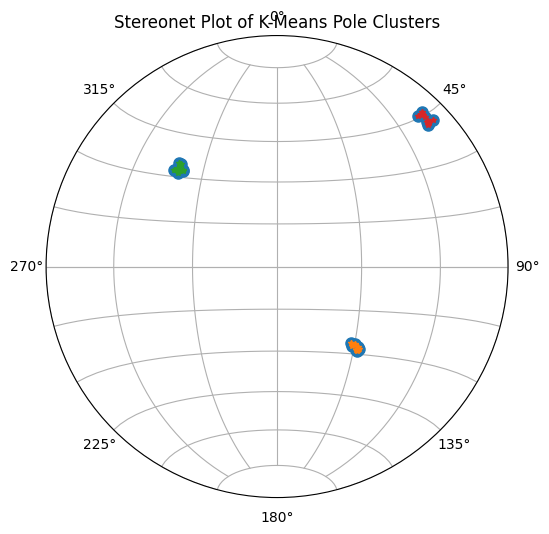

In [29]:
#4.0 K-Means
#removal of entries with possible error note
df_filtered = dataset[~dataset['ID'].isin(['P4-2','P4-1', 'P4-3'])]
strikes_filtered = df_filtered['Strike']
dips_filtered = df_filtered['Dip']

pole_filtered = mplstereonet.pole(strikes_filtered, dips_filtered)

#K-Means Clustering
km = KMeans(n_clusters=3)

pred = km.fit_predict(df_filtered[['Latitude', 'Longitude']])


df_filtered['Cluster'] = pred


df1 = df_filtered[df_filtered['Cluster'] == 0]
df2 = df_filtered[df_filtered['Cluster'] == 1]
df3 = df_filtered[df_filtered['Cluster'] == 2]
print(df1)
print(df2)
print(df3)


pole1 = mplstereonet.pole(df1['Strike'], df1['Dip'])
pole2 = mplstereonet.pole(df2['Strike'], df2['Dip'])
pole3 = mplstereonet.pole(df3['Strike'], df3['Dip'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='stereonet')


# Plot the poles on the stereonet axes
ax.plot(pole_filtered[0], pole_filtered[1], 'o', markersize=8)
ax.plot(pole1[0], pole1[1], '*', markersize=4)
ax.plot(pole2[0], pole2[1], '*', markersize=4)
ax.plot(pole3[0], pole3[1], '*', markersize=4)


ax.grid(True)
plt.title('Stereonet Plot of K-Means Pole Clusters')
plt.show()

In [30]:
#Averaging Identified Clusters
df1_strike = df1['Strike'].mean()
df1_dip = df1['Dip'].mean()
df2_strike = df2['Strike'].mean()
df2_dip = df2['Dip'].mean()
df3_strike = df3['Strike'].mean()
df3_dip = df3['Dip'].mean()

print(df1_strike)
print(df1_dip)
print(df2_strike)
print(df2_dip)
print(df3_strike)
print(df3_dip)

225.76999999999998
40.4
44.88
50.269999999999996
135.08999999999997
79.84


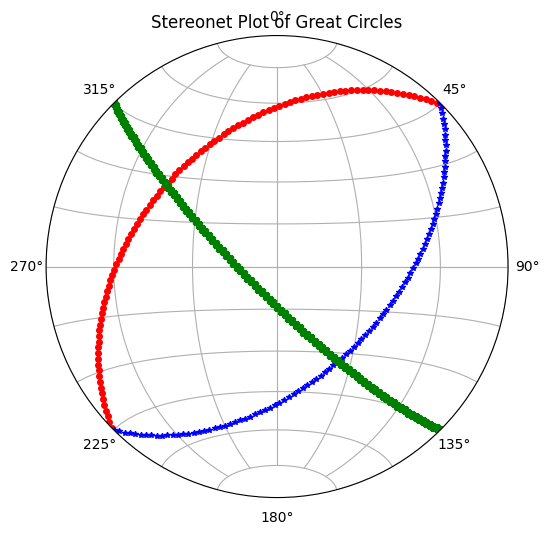

In [31]:
#Plot Great Circles
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='stereonet')


# Plot the poles on the stereonet axes
ax.plane(df1_strike, df1_dip, 'o', markersize=4, color='r')
ax.plane(df2_strike, df2_dip, '*', markersize=4, color='b')
ax.plane(df3_strike, df3_dip, 's', markersize=4, color='g')


ax.grid(True)
plt.title('Stereonet Plot of Great Circles')
plt.show()

In [32]:
# Signature Cell

print("first name, last name, and netID below:")

first_name = input("First Name: ")
last_name = input("Last Name: ")
netID = input("NetID: ")

print(f"Thank you, {first_name} {last_name}. Your netID, {netID}, has been recorded.")

first name, last name, and netID below:
First Name: Kyle
Last Name: Areaux
NetID: Kareaux2
Thank you, Kyle Areaux. Your netID, Kareaux2, has been recorded.
